In [184]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [185]:
'pip install yahoofinancials'
from yahoofinancials import YahooFinancials

In [204]:
# type the ticker of the public equity you want to analyze
ticker = 'CHKP'

In [205]:
yahoo_financials = YahooFinancials(ticker)
balance_sheet_data = yahoo_financials.get_financial_stmts('annual', 'balance')

In [206]:
dataframe_entries = list()
for result in balance_sheet_data.get('balanceSheetHistory').get(ticker):
    extracted_date = list(result)[0]
    dataframe_row = list(result.values())[0]
    dataframe_row['date'] = extracted_date
    dataframe_entries.append(dataframe_row)

df_bs = pd.DataFrame(dataframe_entries).set_index('date')

In [207]:
income_statement_data = yahoo_financials.get_financial_stmts('annual', 'income')
dataframe_entries1 = list()
for result1 in income_statement_data.get('incomeStatementHistory').get(ticker):
    extracted_date1 = list(result1)[0]
    dataframe_row1 = list(result1.values())[0]
    dataframe_row1['date'] = extracted_date1
    dataframe_entries1.append(dataframe_row1)

df_is = pd.DataFrame(dataframe_entries1).set_index('date')

In [208]:
altman_df = df_bs.join(df_is, on=df_is.index)
altman_df['mktcap'] = df_mktcap[0]

In [209]:
altman_df['Z_score'] = (1.2*(altman_df.totalCurrentAssets - altman_df.totalCurrentLiabilities)/altman_df.totalAssets) + (
                        2.4*altman_df.retainedEarnings/altman_df.totalAssets) + (
                        3.3*altman_df.ebit/altman_df.totalAssets) + (
                        0.6*altman_df.mktcap/altman_df.totalLiab) + (
                        0.999*altman_df.totalRevenue/altman_df.totalAssets)

In [210]:
altman_df

,intangibleAssets,capitalSurplus,totalLiab,totalStockholderEquity,otherCurrentLiab,totalAssets,commonStock,retainedEarnings,otherLiab,treasuryStock,...,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,mktcap,Z_score
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,1040700000,2028400000,2373000000,3466200000,1108600000,5839200000,800000,10715300000,829200000,-9278300000,...,124200000,2064900000,1160700000,219900000,66600000,None,846600000,846600000,8224897536,7.499057
2019-12-31,42800000,1770300000,2196100000,3568800000,1011900000,5764900000,800000,9868700000,770200000,-8071000000,...,136700000,1994800000,1113000000,209800000,80600000,None,825700000,825700000,8224897536,7.359564
2018-12-31,41000000,1597800000,2055800000,3772400000,980200000,5828200000,800000,9043000000,723900000,-6869200000,...,157600000,1916500000,1002700000,198600000,65100000,None,821300000,821300000,8224897536,7.174066
2017-12-31,18395000,1305130000,1862803000,3600123000,878287000,5462926000,774000,8203035000,655878000,-5908816000,...,168000000,1854700000,930800000,210800000,47000000,None,802900000,802900000,8224897536,7.316664


/Users/omgc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


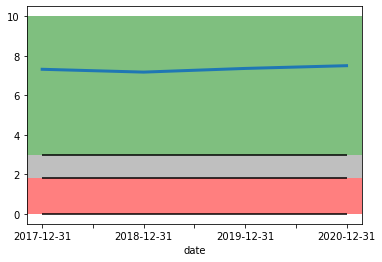

In [211]:
altman_df.sort_index(ascending=True)['Z_score'].plot(linewidth=3)
plt.hlines(3, xmin=0, xmax=len(altman_df.Z_score)-1)
plt.hlines(1.8, xmin=0, xmax=len(altman_df.Z_score)-1)
plt.hlines(0, xmin=0, xmax=len(altman_df.Z_score)-1)

ax = plt.subplot()
ax.axhspan(0,1.8,facecolor='red', alpha = 0.5)
ax.axhspan(1.8,3,facecolor='gray', alpha = 0.5)
ax.axhspan(3,10,facecolor='green', alpha = 0.5)